# Proyect 2

## Exploratory Analysis

In [1]:
# Make imports
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
# download word packages
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Lectura del archivo
datos = pd.read_csv('spam-2.csv', encoding='iso-8859-2')
# Get just the columns that has some values
datos = datos[["v1", "v2"]]
# Rename columns
datos = datos.rename(columns={"v1": "category", "v2": "message"})
# Convert to minus letters and filter not character
datos["message"] = datos["message"].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x.lower()))
# Get the words splitted with the tokenize function
datos["words"] = datos["message"].apply(lambda x: nltk.tokenize.word_tokenize(x))
# Get the amount of words per message
datos["amountWords"] = datos["words"].apply(lambda x: len(x))
datos.head()

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13


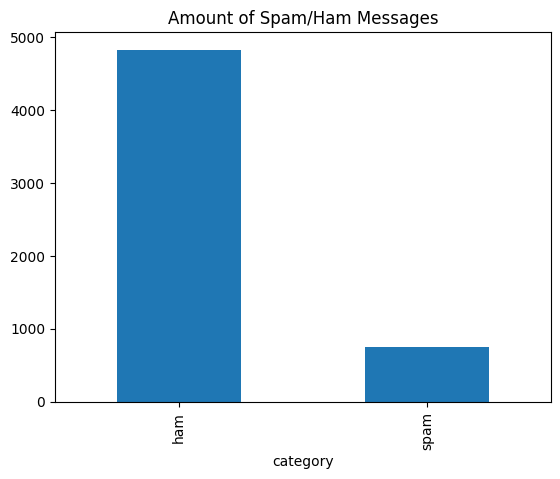

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ham,4825.0,13.810570,11.047508,0.0,7.0,10.0,18.0,171.0
spam,747.0,21.172691,5.479761,1.0,19.0,22.0,25.0,32.0


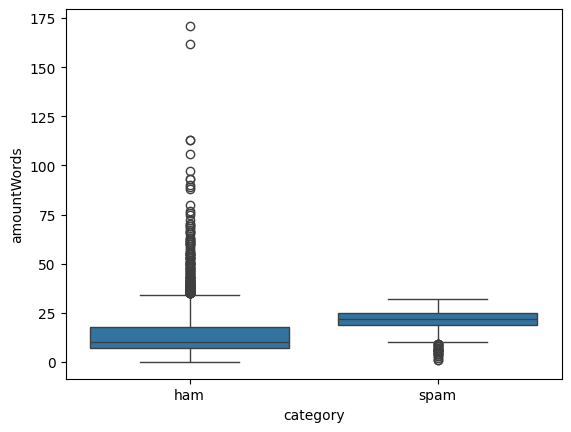

In [3]:
# Amount of ham and spam
datos.groupby(["category"])["category"].count().plot(kind = 'bar')
plt.title("Amount of Spam/Ham Messages")
plt.show()
# plot amount of words by ham or spam
sns.boxplot(x="category", y="amountWords", data=datos)
datos.groupby(["category"])["amountWords"].describe()

## Data Cleaning

### Delete tokens with any symbol that is not a character

In [4]:
datos["words"] = datos["words"].apply(lambda x: [word for word in x if not re.search(r'(\W+|[0-9])', word)])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[this, is, the, nd, time, we, have, tried, con...",26
5568,ham,will b going to esplanade fr home,"[will, b, going, to, esplanade, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...",9
5570,ham,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...",26


### Delete Stop Words

In [5]:
stop = nltk.corpus.stopwords.words('english')
datos["words"] = datos["words"].apply(lambda x: [word for word in x if word not in (stop)])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goes, usf, lives, around, t...",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[nd, time, tried, contact, u, u, pound, prize,...",26
5568,ham,will b going to esplanade fr home,"[b, going, esplanade, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestions]",9
5570,ham,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...",26


### Lemmatization

In [6]:
lemmatizer = nltk.stem.WordNetLemmatizer()
datos["words"] = datos["words"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazy, available, bugis, n...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entry, wkly, comp, win, fa, cup, final,...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, go, usf, life, around, though]",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[nd, time, tried, contact, u, u, pound, prize,...",26
5568,ham,will b going to esplanade fr home,"[b, going, esplanade, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[pity, mood, soany, suggestion]",9
5570,ham,the guy did some bitching but i acted like id ...,"[guy, bitching, acted, like, id, interested, b...",26


### Stemming

In [7]:
ps = nltk.stem.PorterStemmer()
datos["words"] = datos["words"].apply(lambda x: [ps.stem(word) for word in x])
datos

,category,message,words,amountWords
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",20
1,ham,ok lar joking wif u oni,"[ok, lar, joke, wif, u, oni]",6
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entri, wkli, comp, win, fa, cup, final,...",25
3,ham,u dun say so early hor u c already then say,"[u, dun, say, earli, hor, u, c, alreadi, say]",11
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, go, usf, life, around, though]",13
...,...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,"[nd, time, tri, contact, u, u, pound, prize, c...",26
5568,ham,will b going to esplanade fr home,"[b, go, esplanad, fr, home]",7
5569,ham,pity was in mood for that soany other suggest...,"[piti, mood, soani, suggest]",9
5570,ham,the guy did some bitching but i acted like id ...,"[guy, bitch, act, like, id, interest, buy, som...",26


In [8]:
spamDictionary = {}
hamDictionary = {}
for x in range(0, datos.count()[0]):
    # Convert to a set to avoid duplicates because we want to count if it shows up in the text not how many times does it shows up
    wordsNotDuplicated = datos.iloc[x].iloc[2]
    isSpamOrHam = datos.iloc[x].iloc[0]
    for word in wordsNotDuplicated:
        if word not in list(hamDictionary.keys()):
            hamDictionary[word]=0
        if word not in list(spamDictionary.keys()):
            spamDictionary[word]=0
        if isSpamOrHam=='ham':
            hamDictionary[word]+=1
        else:
            spamDictionary[word]+=1

/tmp/ipykernel_71025/4218214774.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for x in range(0, datos.count()[0]):


### Top Words in Spam

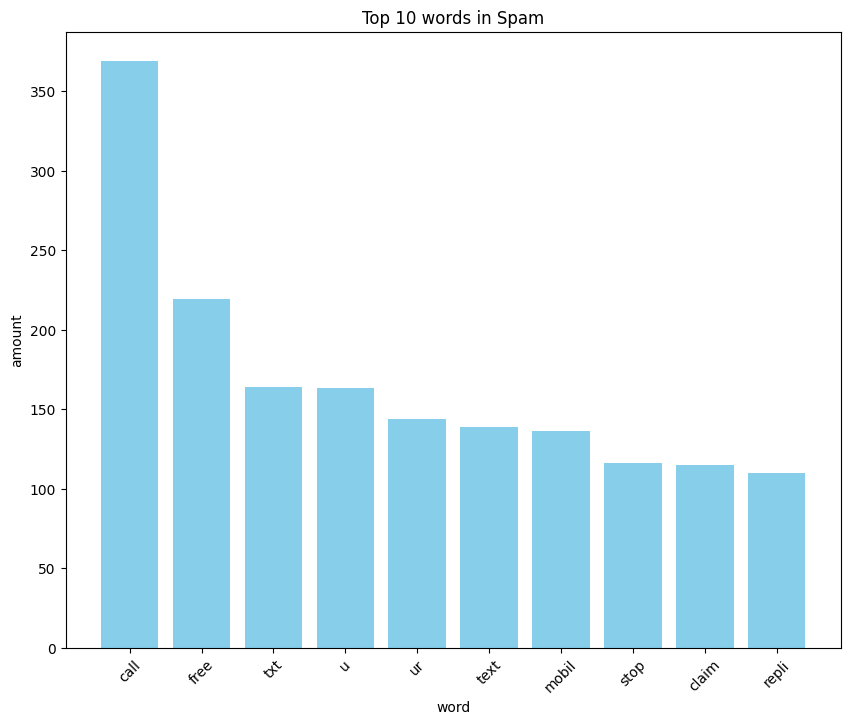

In [9]:
sorted_spam_words = sorted(spamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_spam_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Spam')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

### Top Words in Ham

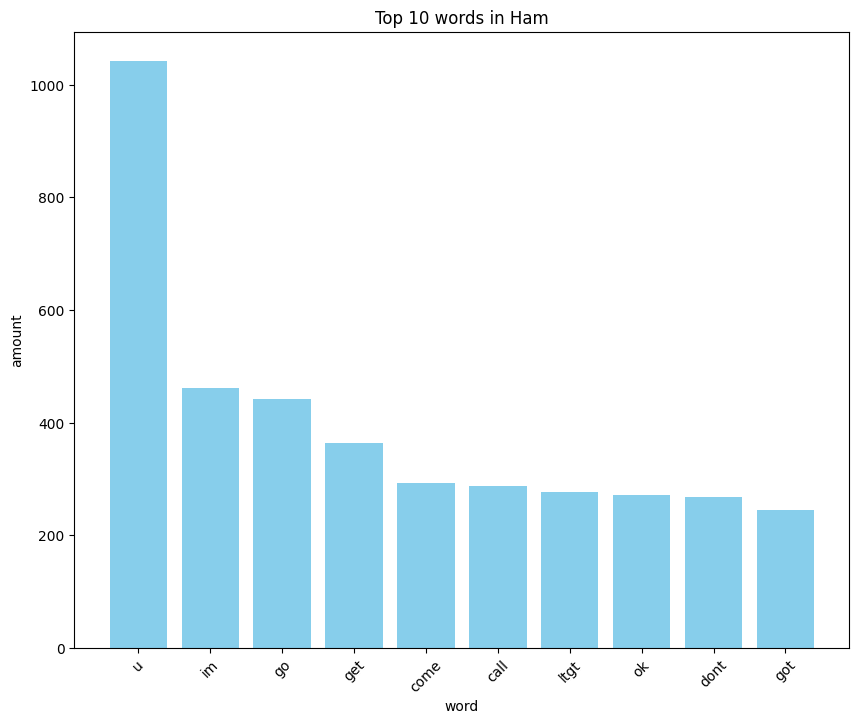

In [10]:
sorted_ham_words = sorted(hamDictionary.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sorted_ham_words)  # Desempaquetar en listas separadas

# Crear la gráfica de barras
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 words in Ham')
plt.xlabel('word')
plt.ylabel('amount')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

## Model

### Divide between train & test

In [11]:
train, test = train_test_split(datos.copy(), test_size=0.20, stratify=datos['category'], random_state=42)
train.head()
test.head()

,category,message,words,amountWords
2826,ham,oh right ok ill make sure that i do loads of w...,"[oh, right, ok, ill, make, sure, load, work, d...",32
3695,ham,i am in tirupur call you da,"[tirupur, call, da]",7
3906,ham,no that just means you have a fat head,"[mean, fat, head]",9
575,spam,you have won cash or a prize to claim call,"[cash, prize, claim, call]",10
2899,ham,come aftr ltdecimalgt now i m cleaning the house,"[come, aftr, ltdecimalgt, clean, hous]",9


### Probability calculus

In [12]:
# Probability that a text is a ham/spam
pHam = train[train["category"]=='ham']['category'].count()/train['category'].count()
pSpam = train[train["category"]=='spam']['category'].count()/train['category'].count()
# Dictionary for probabilities that a text is a Spam/Ham given a word
pTextGivenWord = {}
# Probabilities for a word
for key in list(hamDictionary.keys()):
    # Probability that a word shows up in ham given is ham
    pWH = hamDictionary[key]/pHam
    # Probability that a word shows up in spma given is spam
    pWS = spamDictionary[key]/pSpam
    # Probability that is spam given a word
    pTextGivenWord[key] = pWS*pSpam/(pWH*pHam+pWS*pSpam)

### Function to calculate a probability given a word

In [13]:
def probabilityGivenAWord(word):
    if word in list(pTextGivenWord.keys()):
        return pTextGivenWord[word]
    else:
        return 0
print(probabilityGivenAWord("u"))

0.13526970954356846


### Function to calculate a probability given a text

In [15]:
def probabilityGivenText(text):
    # Probability that a text is a ham/spam
    pHam = train[train["category"]=='ham']['category'].count()/train['category'].count()
    pSpam = train[train["category"]=='spam']['category'].count()/train['category'].count()
    keys = list(pSpam.keys())
    if type(text)!= list:
        # Tokenize & clean text
        text = nltk.tokenize.word_tokenize(re.sub(r'[^a-zA-Z ]', '', text.lower()))
        text = [word for word in text if not re.search(r'(\W+|[0-9])', word)]
    numerator = 1
    denominatorLeft = 1
    denominatorRight = 1
    for word in (text and keys):
        pW = (pSpam[word]/pSpam)/(pHam[word]/pHam+pSpam[word]/pSpam)
        numerator *= pW
        denominatorLeft *= pW 
        denominatorRight *= (1-pW)
    if numerator == 1 and denominatorLeft == 1 and denominatorRight == 1:
        return 0
    return numerator/(denominatorLeft+denominatorRight)   

## Pruebas de Rendimiento